In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

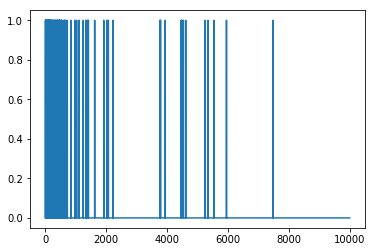

In [3]:
plt.plot(train_data[0])


In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [5]:
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

W0627 14:11:14.011423 14648 deprecation.py:323] From C:\Users\Magenta\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5412 - accuracy: 0.7856 - binary_crossentropy: 0.5412 - val_loss: 0.3846 - val_accuracy: 0.8628 - val_binary_crossentropy: 0.3846
Epoch 2/20
25000/25000 - 3s - loss: 0.2836 - accuracy: 0.9006 - binary_crossentropy: 0.2836 - val_loss: 0.2916 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.2916
Epoch 3/20
25000/25000 - 3s - loss: 0.1995 - accuracy: 0.9295 - binary_crossentropy: 0.1995 - val_loss: 0.2841 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2841
Epoch 4/20
25000/25000 - 3s - loss: 0.1580 - accuracy: 0.9449 - binary_crossentropy: 0.1580 - val_loss: 0.3053 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.3053
Epoch 5/20
25000/25000 - 3s - loss: 0.1254 - accuracy: 0.9582 - binary_crossentropy: 0.1254 - val_loss: 0.3339 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.3339
Epoch 6/20
25000/25000 - 3s - loss: 0.0998 - accuracy: 0.9686 - binary_crossentropy: 0.0998 - val_loss: 0.3654

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6029 - accuracy: 0.6839 - binary_crossentropy: 0.6029 - val_loss: 0.5078 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.5078
Epoch 2/20
25000/25000 - 3s - loss: 0.3972 - accuracy: 0.8893 - binary_crossentropy: 0.3972 - val_loss: 0.3564 - val_accuracy: 0.8836 - val_binary_crossentropy: 0.3564
Epoch 3/20
25000/25000 - 3s - loss: 0.2649 - accuracy: 0.9207 - binary_crossentropy: 0.2649 - val_loss: 0.2992 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2992
Epoch 4/20
25000/25000 - 3s - loss: 0.2045 - accuracy: 0.9375 - binary_crossentropy: 0.2045 - val_loss: 0.2871 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2871
Epoch 5/20
25000/25000 - 3s - loss: 0.1724 - accuracy: 0.9472 - binary_crossentropy: 0.1724 - val_loss: 0.2908 - val_accuracy: 0.8842 - val_binary_crossentropy: 0.2908
Epoch 6/20
25000/25000 - 3s - loss: 0.1502 - accuracy: 0.9540 - binary_crossentropy: 0.1502 - val_loss: 0.3010

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.3502 - accuracy: 0.8505 - binary_crossentropy: 0.3502 - val_loss: 0.3095 - val_accuracy: 0.8725 - val_binary_crossentropy: 0.3095
Epoch 2/20
25000/25000 - 5s - loss: 0.1441 - accuracy: 0.9475 - binary_crossentropy: 0.1441 - val_loss: 0.3273 - val_accuracy: 0.8750 - val_binary_crossentropy: 0.3273
Epoch 3/20
25000/25000 - 5s - loss: 0.0466 - accuracy: 0.9868 - binary_crossentropy: 0.0466 - val_loss: 0.4337 - val_accuracy: 0.8706 - val_binary_crossentropy: 0.4337
Epoch 4/20
25000/25000 - 5s - loss: 0.0073 - accuracy: 0.9987 - binary_crossentropy: 0.0073 - val_loss: 0.5799 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.5799
Epoch 5/20
25000/25000 - 5s - loss: 0.0012 - accuracy: 0.9999 - binary_crossentropy: 0.0012 - val_loss: 0.6608 - val_accuracy: 0.8713 - val_binary_crossentropy: 0.6608
Epoch 6/20
25000/25000 - 5s - loss: 2.4273e-04 - accuracy: 1.0000 - binary_crossentropy: 2.4273e-04 - val_loss

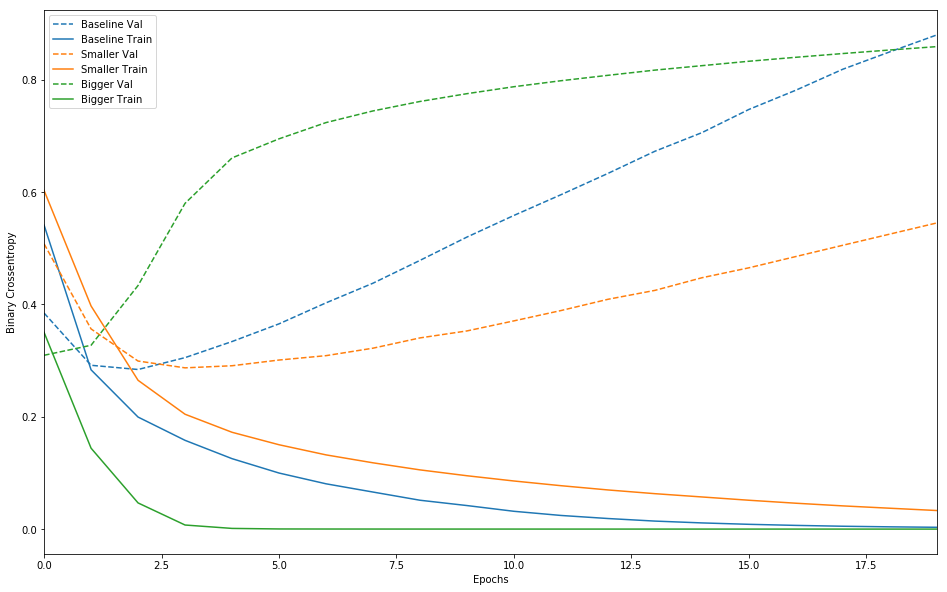

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5447 - accuracy: 0.8164 - binary_crossentropy: 0.5058 - val_loss: 0.4113 - val_accuracy: 0.8710 - val_binary_crossentropy: 0.3708
Epoch 2/20
25000/25000 - 3s - loss: 0.3293 - accuracy: 0.9012 - binary_crossentropy: 0.2838 - val_loss: 0.3442 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2950
Epoch 3/20
25000/25000 - 3s - loss: 0.2742 - accuracy: 0.9229 - binary_crossentropy: 0.2222 - val_loss: 0.3489 - val_accuracy: 0.8805 - val_binary_crossentropy: 0.2950
Epoch 4/20
25000/25000 - 3s - loss: 0.2485 - accuracy: 0.9324 - binary_crossentropy: 0.1928 - val_loss: 0.3416 - val_accuracy: 0.8851 - val_binary_crossentropy: 0.2848
Epoch 5/20
25000/25000 - 3s - loss: 0.2305 - accuracy: 0.9415 - binary_crossentropy: 0.1727 - val_loss: 0.3504 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2919
Epoch 6/20
25000/25000 - 3s - loss: 0.2198 - accuracy: 0.9458 - binary_crossentropy: 0.1603 - val_loss: 0.3642

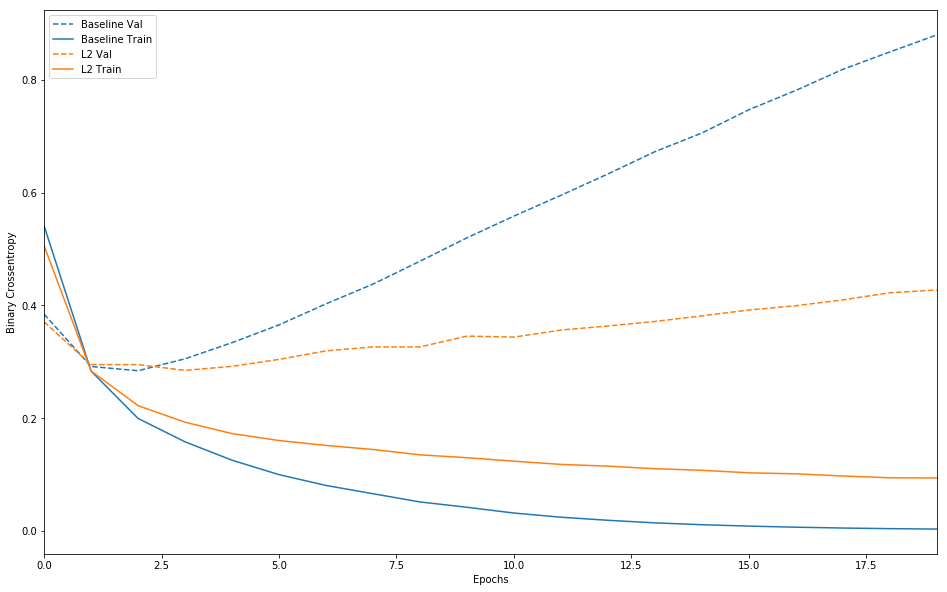

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [18]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6209 - accuracy: 0.6635 - binary_crossentropy: 0.6209 - val_loss: 0.4751 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.4751
Epoch 2/20
25000/25000 - 3s - loss: 0.4357 - accuracy: 0.8250 - binary_crossentropy: 0.4357 - val_loss: 0.3301 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3301
Epoch 3/20
25000/25000 - 3s - loss: 0.3390 - accuracy: 0.8732 - binary_crossentropy: 0.3390 - val_loss: 0.2856 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2856
Epoch 4/20
25000/25000 - 3s - loss: 0.2808 - accuracy: 0.9032 - binary_crossentropy: 0.2808 - val_loss: 0.2742 - val_accuracy: 0.8892 - val_binary_crossentropy: 0.2742
Epoch 5/20
25000/25000 - 3s - loss: 0.2410 - accuracy: 0.9178 - binary_crossentropy: 0.2410 - val_loss: 0.2800 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2800
Epoch 6/20
25000/25000 - 3s - loss: 0.2113 - accuracy: 0.9297 - binary_crossentropy: 0.2113 - val_loss: 0.2921